<a href="https://colab.research.google.com/github/ShrutiSharma111/NETFLIX_MOVIES_AND_TV_SHOWS/blob/main/Final_Colab_on_Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised



##### **Contribution**    - Team

**Team Member 1** - Shruti Sharma

**Team Member 2** - Laxmi Priya

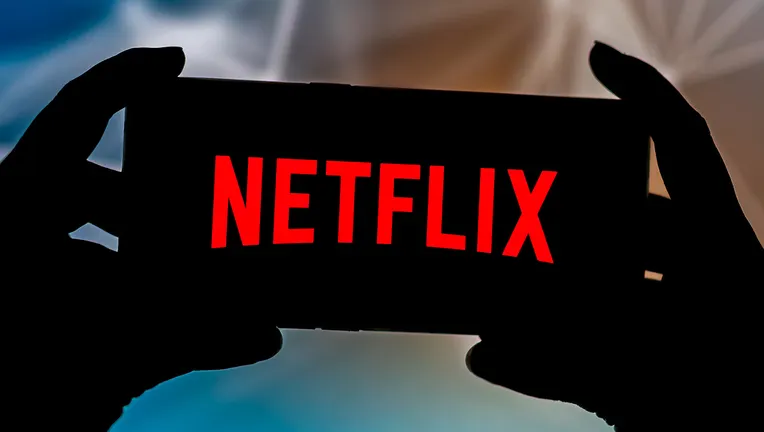

# **Project Summary -**

Netflix leverages data analysis and machine learning to improve the user experience on its subscription-based streaming service. With a vast content catalog, finding relevant content can be challenging for users. To address this, Netflix employs a data-driven approach called "Movies and TV Shows Clustering" using unsupervised machine learning algorithms. The aim of this project is to analyse the dataset of movies and TV Shows on Netflix, making personalized content recommendations possible based on users' viewing history and preferences.

This dataset contains 7787 rows and 12 columns. It contains no duplicate values but there are some features having missing values. Then moved further for Data Wrangling which includes handling of missing values, unnesting of some features, then amalgamation of unnested features, then did  typecasting and then binned the values in 'rating' column.

Further we moved for Data Visualization in whic we did total 15 visualization including heatmap to analyse the insights properly.

Next step we have taken for Feature Engineering and Manipulatio in which did mainly 'Text Data Preprocessing' and 'Dimensionality Reduction'(by PCA technique). Then moved for main body of this project i.e., ML Model Implementation
  
We have chosen 'K-Means clustering' as our first ML model used Silhoutte Score to know the optimal number of clusters.

Then our 2nd model is Hierarchial clustering in which Agglomerative hierarchial clustering is used in which we got two optimal number of clusters

Lastly built a recommendation system to immprove the user experience by recommending 10 related shows according to their interest.

# **GitHub Link -**

https://github.com/ShrutiSharma111/NETFLIX_MOVIES_AND_TV_SHOWS

# **Problem Statement**


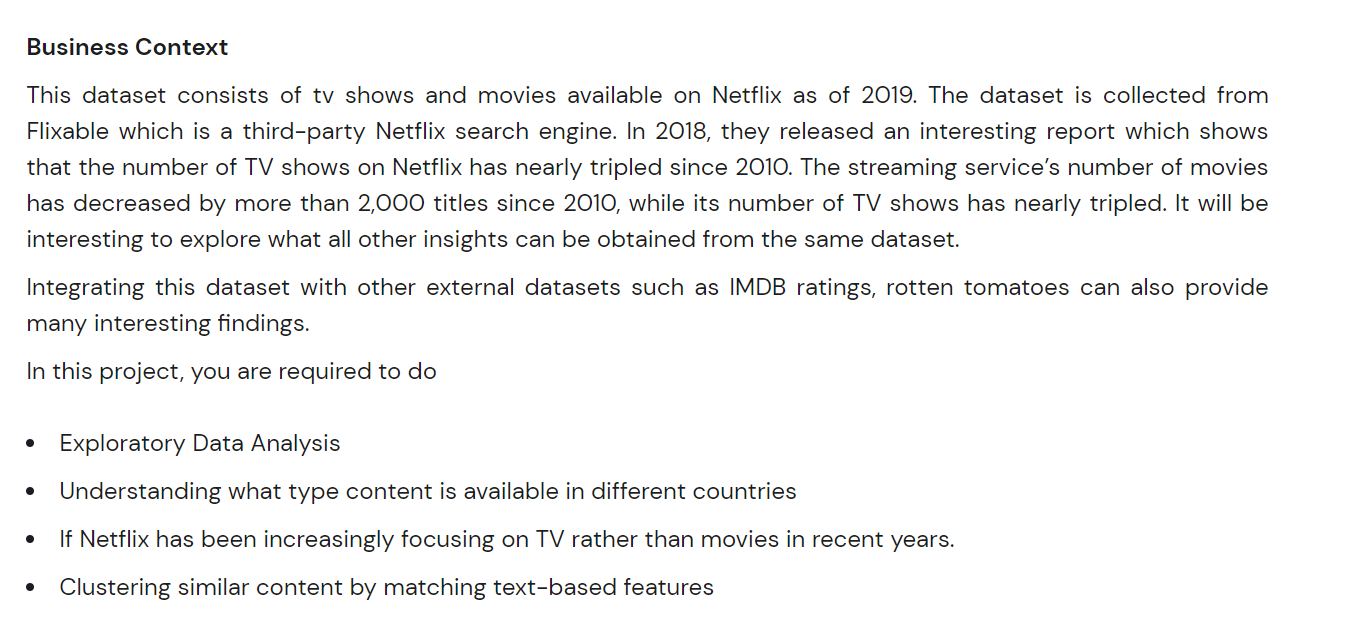

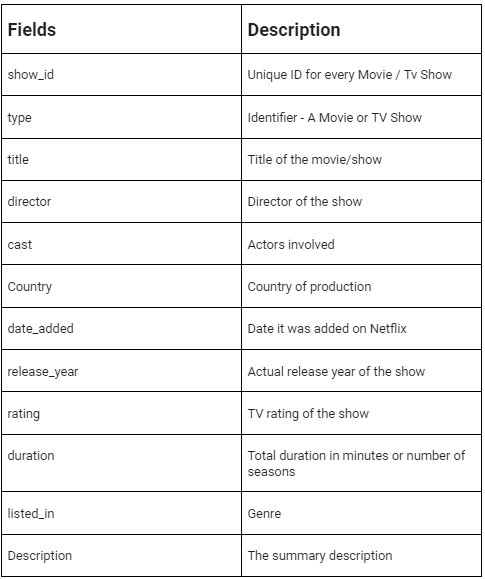

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

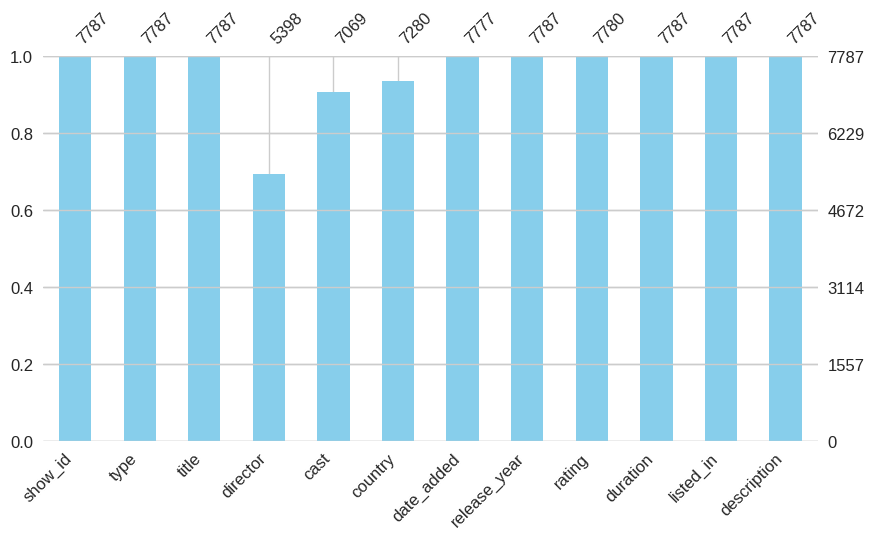

In [ ]:
# Visualizing the missing values
missingno.bar(df, figsize =(10,5), fontsize = 12, color = 'skyblue')

### What did you know about your dataset?

--> We have total 7787 rows and 12 columns

--> We have only one feature release year is of int type and rest ofthe features are of object type.

--> In our dataset we have none duplicate values.

--> There are some features which have missing values. those features are-- director, cast, country, date_added and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Required column names are---{df.columns.tolist()}'")

Required column names are---['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']'


In [ ]:
# Dataset Describe
df.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

Required description of variable are listed below:

**--> show_id:** Unique Identifier for each Movie or Show.

**--> type:** It indicates whether the entry is a Movie or a TV Show.

**--> title:** Given title to the Movie/TV Show.

**--> director:** Name of the director of a particular Movie/TV Show.

**--> cast:** Cast is referred as names of the Actors or Actresses featured in a particular Movie/TV show.

**--> country:** Country denotes where a  particular Movie or TV Show was produced.

**--> date_added:** It denotes when a particular Movie or TV Show was added to the Netflix.

**--> release_year:** It denotes the year in which a particular Movie or TV Show was released.

**--> rating:** TV rating or Movie rating of the Movie or TV Show.

**--> duration:** Length of the Movie/TV Show in minutes or number of seasons.

**--> listed_in:** Categories or genres of the Movie or TV Show.

**--> description:** Brief summary of the Movie/TV Show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

1. First of all Handling Missing Values.

In [ ]:
# sorting features having missing values
print('sorted features having missing values')
print('-'*50)
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

sorted features having missing values
--------------------------------------------------


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [ ]:
# handling missing values in director and cast with label 'unknown'
df[['director']] = df[['director']].fillna('unknown')
df[['cast']] =df[['cast']].fillna('unknown')

In [ ]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# country is not showing that much missing values nd most of the movies or shows are from US only
# so we can fill mising values of country with mode
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [ ]:
# dropping missing values of date_added and rating
df.dropna(subset = ['date_added', 'rating'], inplace = True)

In [ ]:
# now rechecking of missing values count if any
print('Missing values count  in each of the feature')
print('-'*50)
df.isnull().sum()

Missing values count  in each of the feature
--------------------------------------------------


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# creating a copy of current dataframe to unnest the original one
df_copy = df.copy()

In [ ]:
# unnesting 'directors' feature
dir_data = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_a = pd.DataFrame(dir_data, index = df['title'])
df_a = df_a.stack()
df_a = pd.DataFrame(df_a.reset_index())
df_a.rename(columns={0:'Directors'},inplace=True)
df_a = df_a.drop(['level_1'],axis=1)
df_a.sample(6)

title         Directors
393                   Al Hayba           unknown
1234                  Bushwick      Cary Murnion
485   America's Next Top Model           unknown
253      A StoryBots Christmas  Evan Spiridellis
465                Alphablocks           unknown
845              Beating Again           unknown

In [ ]:
# unnesting 'cast' Feature
cast_data = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_b = pd.DataFrame(cast_data, index = df['title'])
df_b = df_b.stack()
df_b = pd.DataFrame(df_b.reset_index())
df_b.rename(columns={0:'Cast'},inplace=True)
df_b = df_b.drop(['level_1'],axis=1)
df_b.sample(6)

title              Cast
36667                    Reality Z      Julia Ianina
21665                   In Paradox      Jafra Younes
31753                 Nathicharami  Greeshma Sridhar
51239        Thor: Tales of Asgard    Alistair Abell
29121  Metallica Through The Never    James Hetfield
20321              Holiday Secrets        Golo Euler

In [ ]:
# unnesting 'listed_in' feature
listedin_data=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_c = pd.DataFrame(listedin_data, index = df['title'])
df_c = df_c.stack()
df_c = pd.DataFrame(df_c.reset_index())
df_c.rename(columns={0:'Genre'},inplace=True)
df_c = df_c.drop(['level_1'],axis=1)
df_c.sample(6)


title               Genre
13345  The Ballad of Buster Scruggs              Dramas
4236          Ek Khiladi Ek Haseena           Thrillers
14037             The Great Gambler  Action & Adventure
14497                 The Lovebirds     Romantic Movies
12699                  Step Outside            Comedies
15372                      The Yard      Crime TV Shows

In [ ]:
# unnesting 'Country' feature
country_data=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_d = pd.DataFrame(country_data, index = df['title'])
df_d = df_d.stack()
df_d = pd.DataFrame(df_d.reset_index())
df_d.rename(columns={0:'Country'},inplace=True)
df_d = df_d.drop(['level_1'],axis=1)
df_d.sample(6)

title        Country
6478    Santa Pac's Merry Berry Day  United States
4399              Life Overtakes Me  United States
3901  John Mellencamp: Plain Spoken  United States
5805            People You May Know  United States
2387          El Potro: Unstoppable  United States
1667      Christmas with the Kranks  United States

In [ ]:
# amalgamating all the unnested features

# Firstly merging Director and Cast
df_x = df_b.merge(df_a,on=['title'],how='inner')

# Then merging listed_in with amalgamation of Director and Cast
df_y = df_x.merge(df_c,on=['title'],how='inner')

# And then merging country with amalgamation of listed_in with 'director and cast'
df_z = df_y.merge(df_d,on=['title'],how='inner')

# final dataframe of all the amalgamations
df_z.head()

title              Cast Directors                   Genre Country
0    3%       João Miguel   unknown  International TV Shows  Brazil
1    3%       João Miguel   unknown               TV Dramas  Brazil
2    3%       João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   unknown               TV Dramas  Brazil

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df_z.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

title              Cast Directors                   Genre Country     type  \
0    3%       João Miguel   unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Cast          175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [ ]:
# Typecasting
df['date_added'] = pd.to_datetime(df['date_added'])

df['added_month'] = df['date_added'].dt.month
df['added_year'] = df['date_added'].dt.year

df.drop("date_added", axis =1, inplace = True)

In [ ]:
# changing dtype of 'duration' from object to int
df["duration"] = df["duration"].apply(lambda x: int(x.split()[0]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Cast          175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  added_month   175807 non-null  int64 
 11  added_year    175807 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 17.4+ MB


In [ ]:
df.head(3)

title         Cast Directors                   Genre Country     type  \
0    3%  João Miguel   unknown  International TV Shows  Brazil  TV Show   
1    3%  João Miguel   unknown               TV Dramas  Brazil  TV Show   
2    3%  João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2020  TV-MA         4   
2          2020  TV-MA         4   

                                         description  added_month  added_year  
0  In a future where the elite inhabit an island ...            8        2020  
1  In a future where the elite inhabit an island ...            8        2020  
2  In a future where the elite inhabit an island ...            8        2020

In [ ]:
# Binning the values in the rating column

# create a dictionary
rating_map = {'TV-MA':'Adult',
              'R':'Adult',
              'PG-13':'Teen',
              'TV-14':'Teen',
              'TV-PG':'Children',
              'NR':'Not Rated',
              'TV-G':'Children',
              'TV-Y':'Family-friendly',
              'TV-Y7':'Family-friendly',
              'PG':'Children',
              'G':'Children',
              'NC-17':'Adult',
              'TV-Y7-FV':'Family-friendly',
              'UR':'Not Rated'}
df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult', 'Teen', 'Children', 'Not Rated', 'Family-friendly'],
      dtype=object)

In [ ]:
df.head()

title              Cast Directors                   Genre Country     type  \
0    3%       João Miguel   unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   unknown               TV Dramas  Brazil  TV Show   

   release_year rating  duration  \
0          2020  Adult         4   
1          2020  Adult         4   
2          2020  Adult         4   
3          2020  Adult         4   
4          2020  Adult         4   

                                         description  added_month  added_year  
0  In a future where the elite inhabit an island ...            8        2020  
1  In a future where the elite inhabit an island ...            8        2020  
2  In a future where the elite inhabit an island ...            8        2020  
3  In a future where the elite inhabit an island ...            8        2020  
4  In a future where the elite inhabit an island ...            8        2020

In [ ]:
df.shape

(175807, 12)

### What all manipulations have you done and insights you found?

We have done Data Wrangling in several steps. These steps are explained below.

--> first we handled the missing values by filling 'director' and 'cast' with label 'Unknown'.
'country' with Mode. Drop null values of 'date_added' and 'rating' (less percentage).

--> Then unnested the values from these features i.e.,
'director',
'cast',
'listed_in' and
'country'
We have unnested the values and stored in different dataframes and then merged all the dataframe with the original one using left join in order to get the isolated values of each of the feature.

--> Then we did typecasted these features: * 'duration' into integer (Removing min and seasons from the values). * 'date_added' to datetime (Into the required format).

We have also extracted the following features:
'month' from 'date_added' and
'year' from 'date_added'.

--> Since We have seen that the 'rating' column contains various coded categories, so we decided to create 5 bins and distributed the values accordingly:

Adult: TV-MA, NC-17

Restricted: R, UR

Teen: PG-13, TV-14

All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG

Not Rated: NR

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

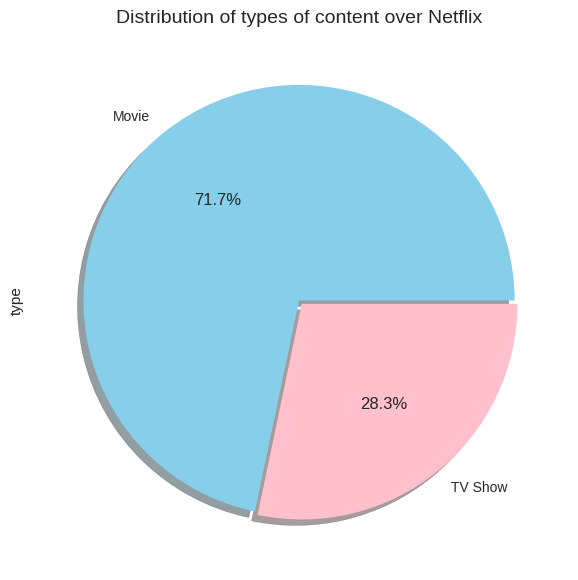

In [ ]:
# Chart - 1 visualization code
# distribution of'types' of content
colors = ['skyblue', 'pink']
df['type'].value_counts().plot.pie(colors = colors, explode= (0,0.02), shadow = True, autopct='%1.1f%%',figsize = (12,7))
plt.title('Distribution of types of content over Netflix',fontsize ='14')
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart as it is good  in showing the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

We can conclude that our dataset contains only 28.3% TV Shows and 71.7% Movies on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the chart it is clear that there is vast competition for movies. So it should be taken care of unique concept and quality in the movies. And at the same place there is a good chance to take a success step in TV Shows as there is less competition.

#### Chart - 2

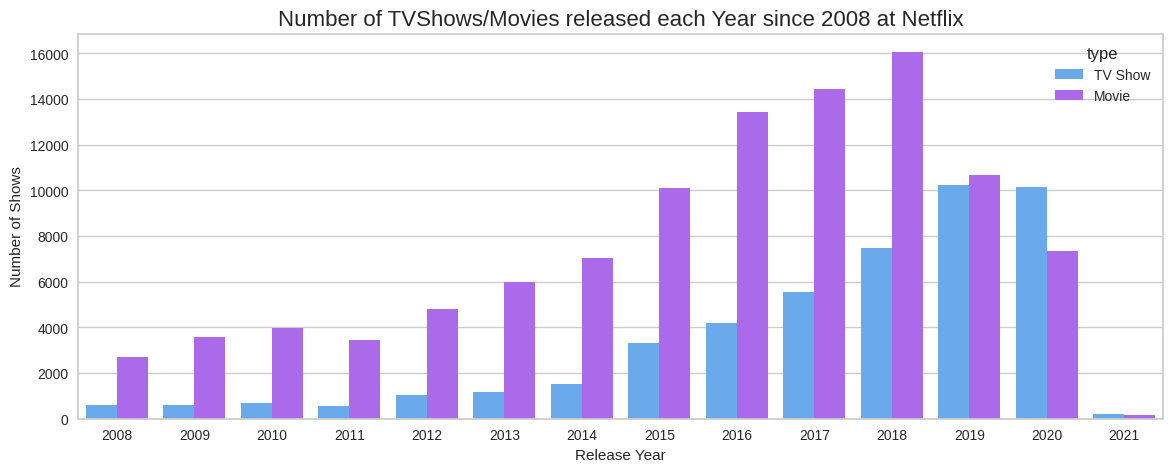

In [ ]:
# Chart - 2 visualization code
# movies and shows released per year
# filtered_df = df[df['release_year'] >= 2008]
plt.figure(figsize=(14, 5))
sns.countplot(x='release_year', data= df, hue ='type', palette ='cool', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of TVShows/Movies released each Year since 2008 at Netflix',fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart to show the number of shows released per year.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies are released in 2018 and TV Shows in the 2019.

Whereas least movie released in the year 2021 and least TV Shows in the year 2021.

#### Chart - 3

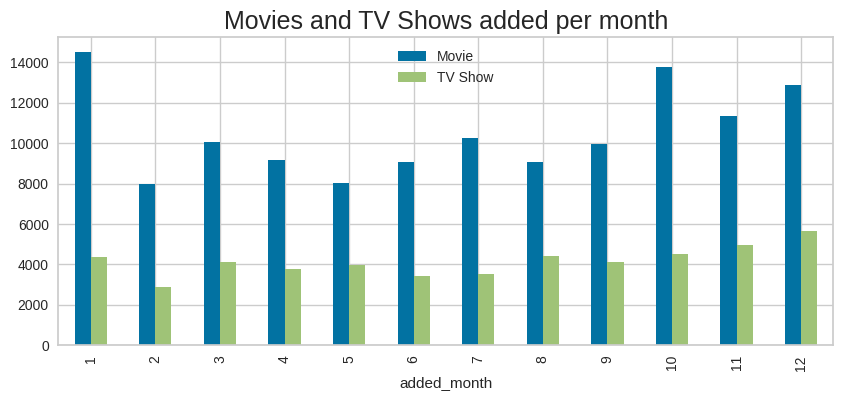

In [ ]:
# visualization chart 3
# Movies/Shows added per month
df.groupby('added_month').type.value_counts().unstack().plot.bar(figsize = (10,4))
plt.legend()
plt.title('Movies and TV Shows added per month',fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart to show the number of shows added per month.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies are added in the  month of January, October and December

And most of the TV Shows are added in the month of October, Nov. and December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions. This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

#### Chart - 4

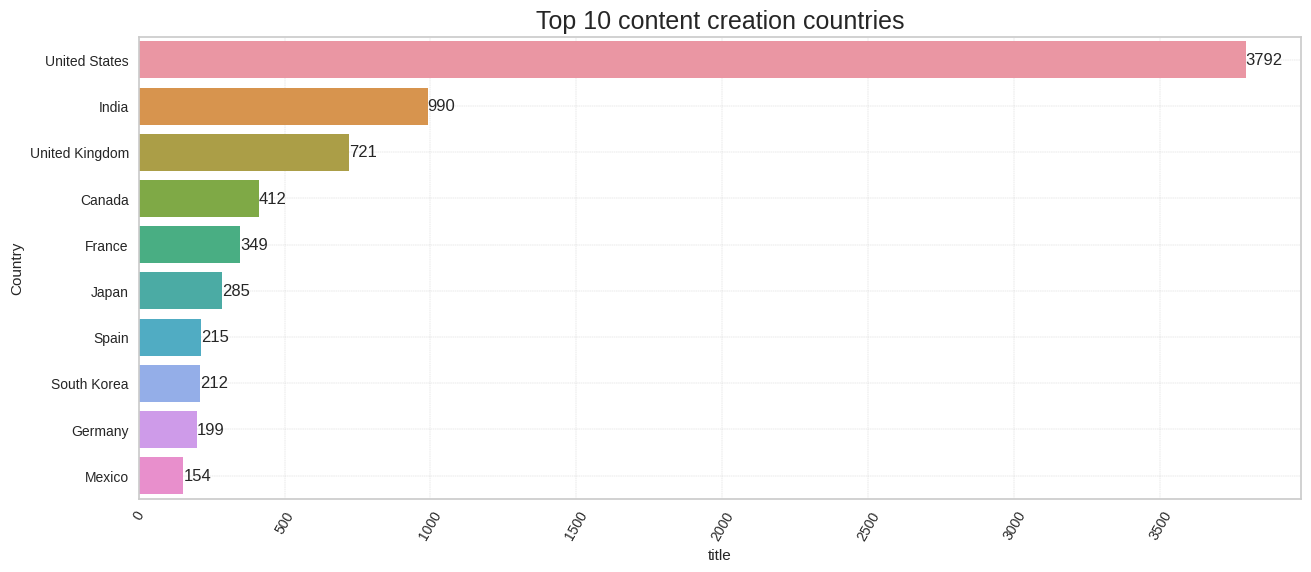

In [ ]:
# Chart - 4 visualization code
df_content = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_content)
plt.xticks(rotation = 60)
plt.title('Top 10 content creation countries',fontsize = 18)
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart to know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

Accoording to the chart United States is the leading country in content creation. India and Canada are at the 2nd and 3rd place in the list

South Korea, Germany and Mexico are at the least position.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will create a positive business impact. Since knowing US is the largest producer of movies and TV shows can help streaming companies plan their content acquisition strategy and marketing efforts accordingly. Additionally, the insight that the top 3 countries account for over half of the shows in the dataset can help companies focus their attention on these markets to maximize their viewership.
Chart - 5

#### Chart - 5

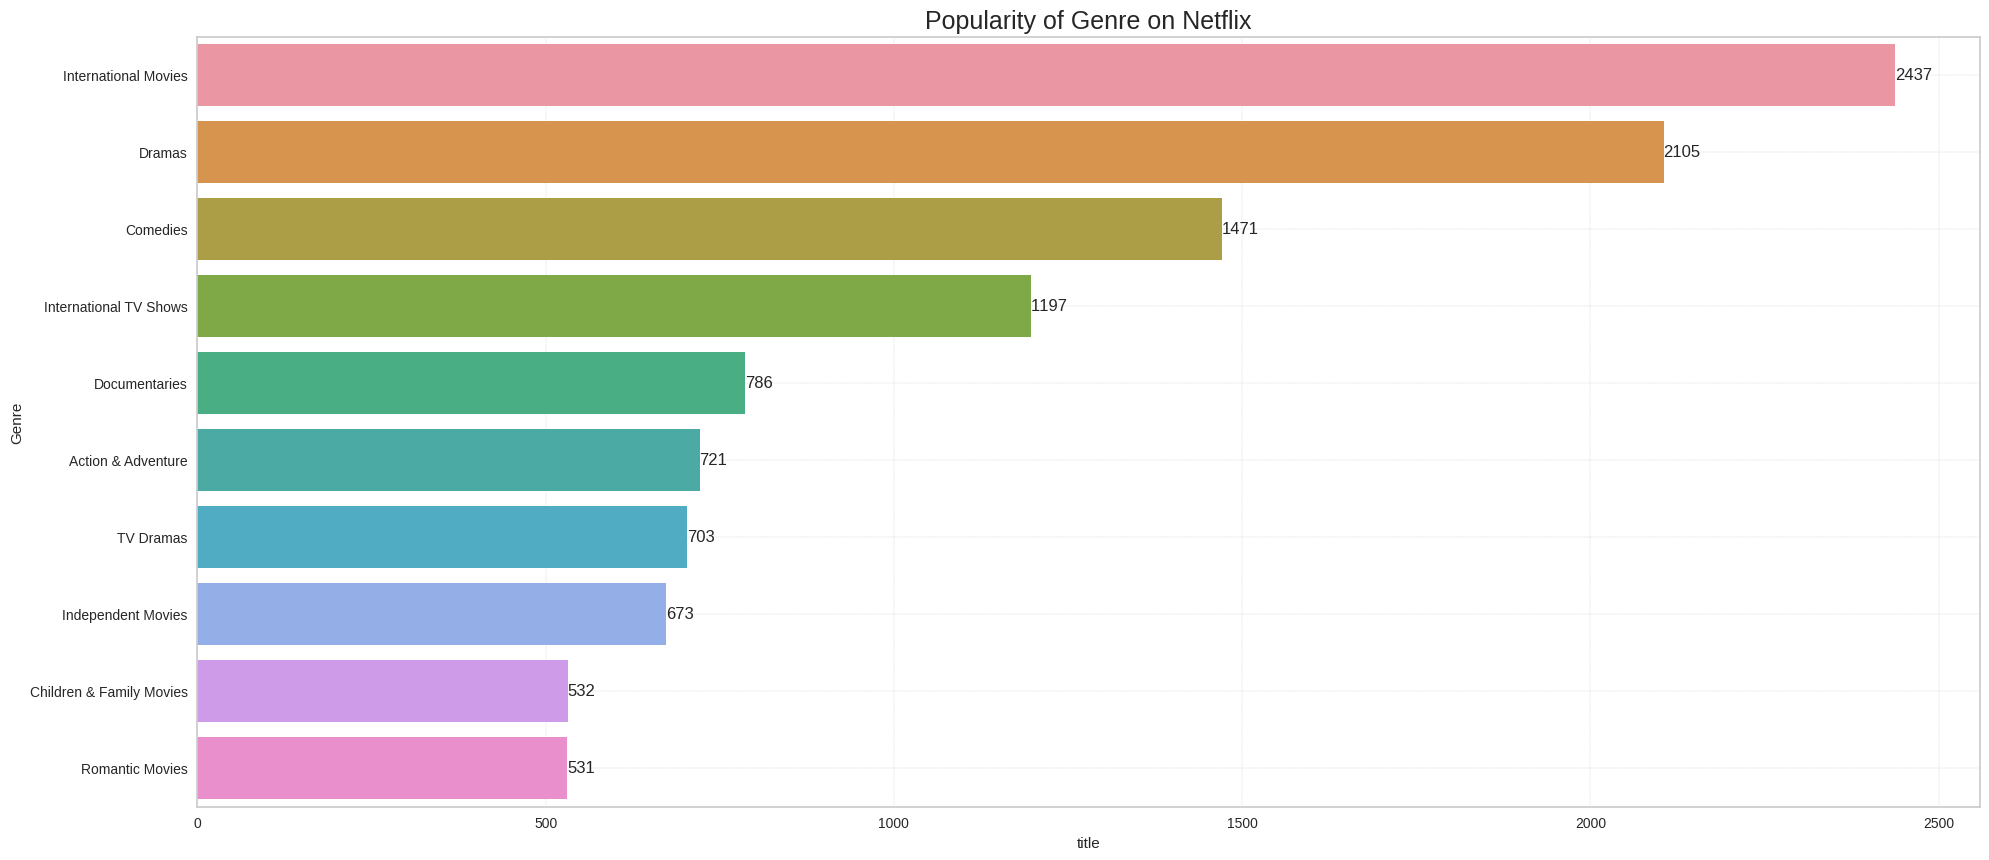

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(23,10))
df_pop_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_pop_genre)
plt.title(f'Popularity of Genre on Netflix', fontsize = 18)
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart to know the popularity of genere on Netflix

##### 2. What is/are the insight(s) found from the chart?

From the chart it is clear that International Movies, Dramas and Comedies are the leading Genere.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is a high chance of success in International movies , Drama and Comedy as people are highly tended towards it due  its quality of concept. In the basal Genere there is also a good  chance of success provided bringing unique concept for the good no. of audience.

#### Chart - 6

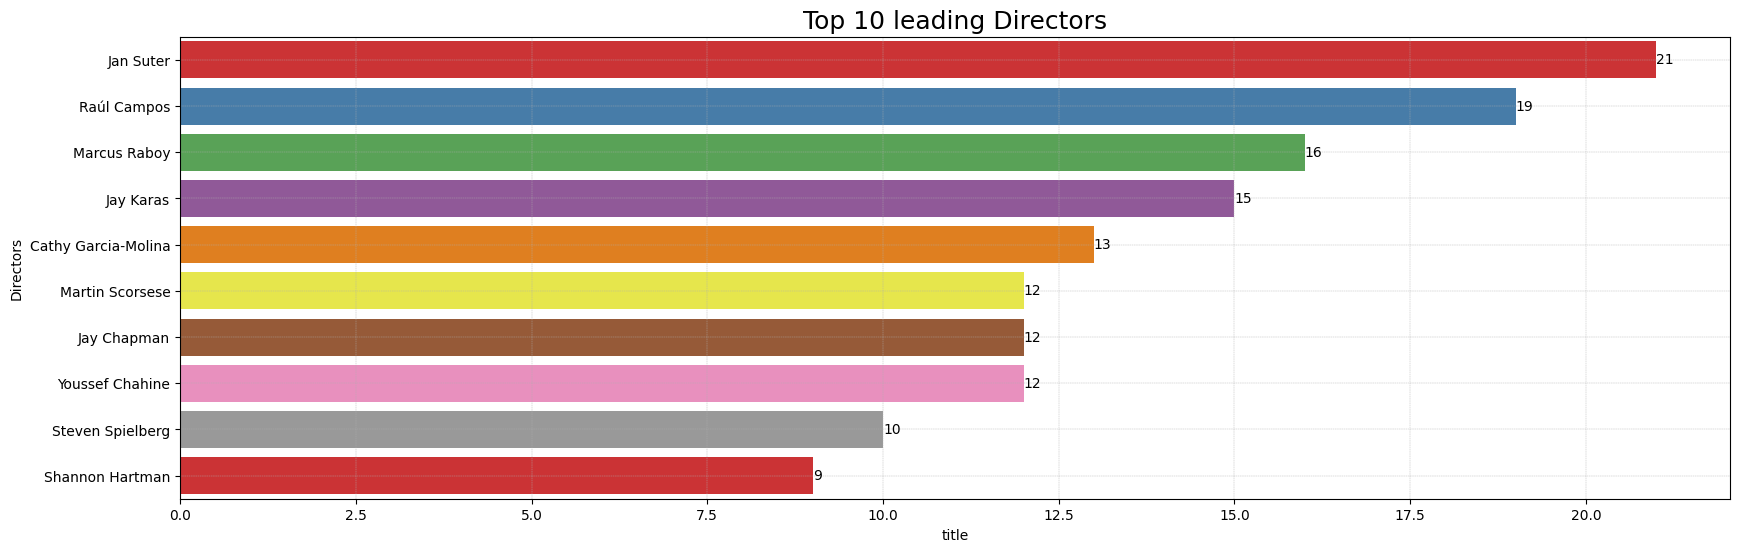

In [ ]:
# Chart - 6 visualization code
# top 10 Directors
plt.style.use('default')
plt.figure(figsize=(20,6))
df_director = df.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:11]
plots= sns.barplot(y = 'Directors',x = 'title', data = df_director, palette='Set1')
plt.title(f'Top 10 leading Directors', fontsize = 18)
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()


##### 1. Why did you pick the specific chart?

We have picked this chart to show the top 10 leading directors

##### 2. What is/are the insight(s) found from the chart?

Jan Suter, Raul Campos and Marcus Raboy are the leadding directors.

#### Chart - 7

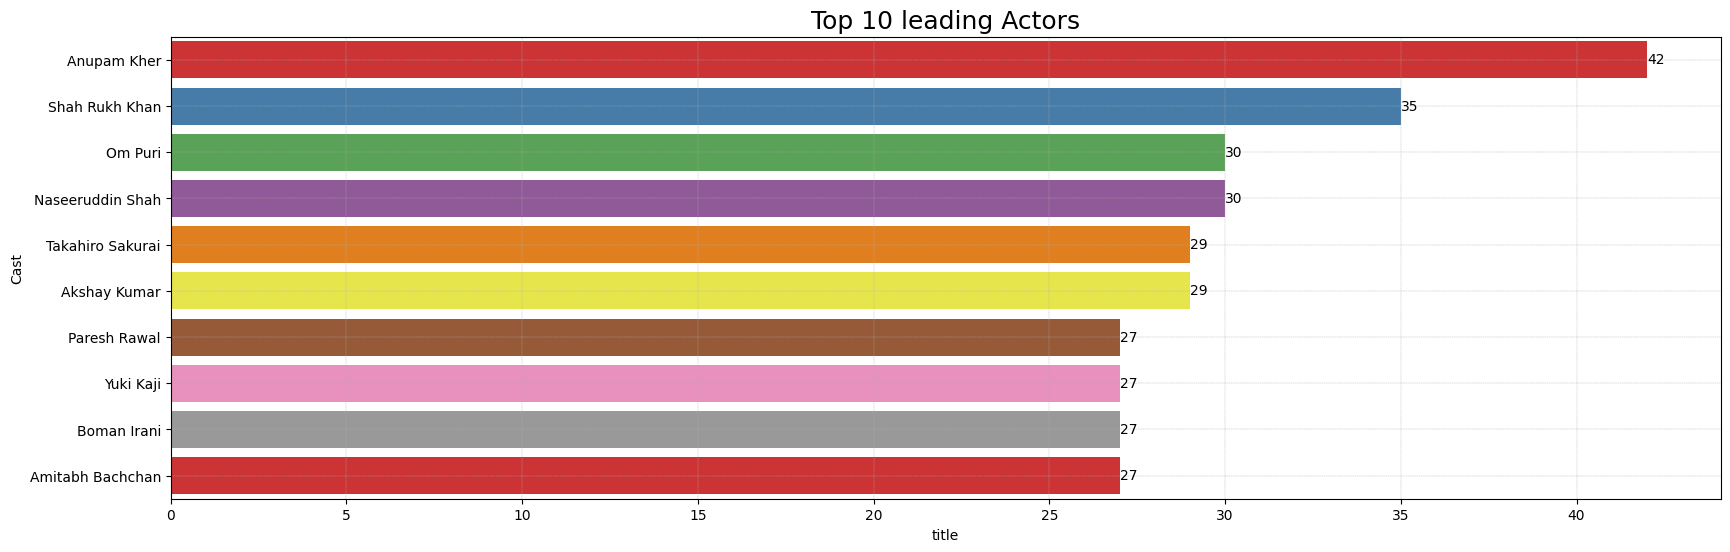

In [ ]:
# Chart - 7 visualization code
plt.style.use('default')
plt.figure(figsize=(20,6))
df_actor = df.groupby(['Cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:11]
plots= sns.barplot(y = 'Cast',x = 'title', data = df_actor, palette='Set1')
plt.title(f'Top 10 leading Actors', fontsize = 18)
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()


##### 1. Why did you pick the specific chart?

We have picked this chart to know about top 10 leading Actors

##### 2. What is/are the insight(s) found from the chart?

Anupam Ker, Shahrukh Khan and Om Puri are the leading actors among all.

#### Chart - 8

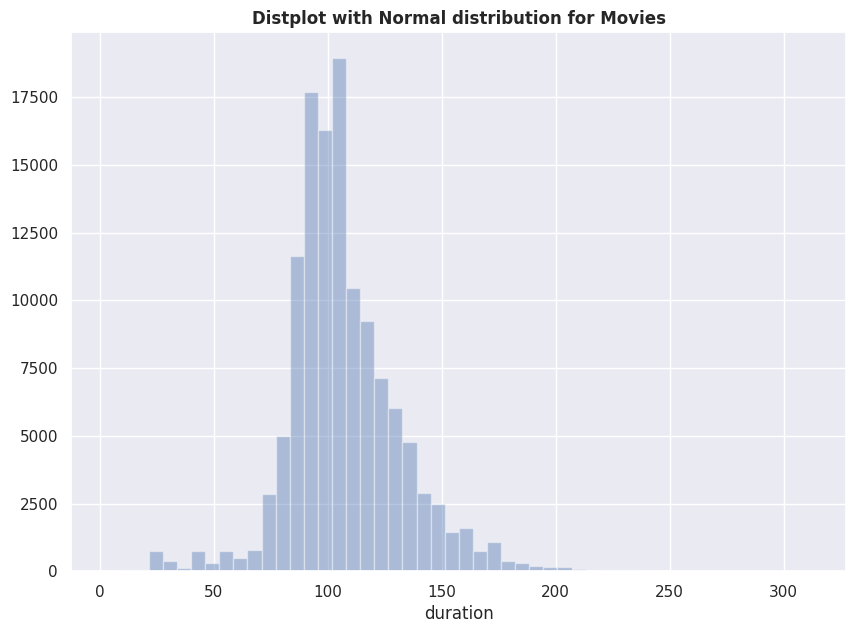

In [ ]:
# visualization chart 8
# duration

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.set(style = 'darkgrid')
plots= sns.distplot(df[df['type'] == 'Movie'].duration,kde=False)
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

We have picked this chart to show know the approximate duration of movies.

##### 2. What is/are the insight(s) found from the chart?

The average duration of the movies is around 90 to 110 min.

Answer Here

#### Chart - 9

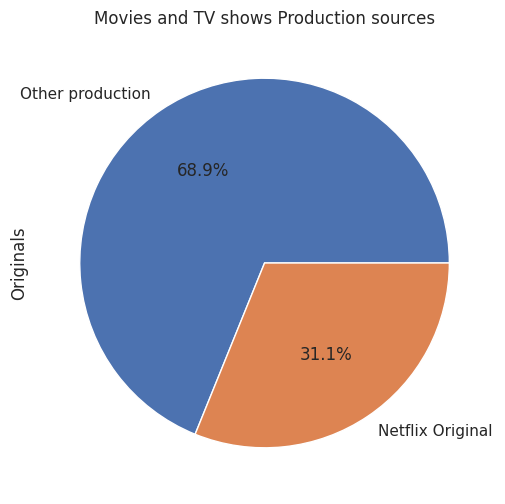

In [ ]:
# Chart - 9 visualization code
# production sources
df['Originals'] = np.where(df['added_year'] == df['release_year'], 'Netflix Original', 'Other production')
df['Originals'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (6,6))
plt.title('Movies and TV shows Production sources')
plt.show()

##### 1. Why did you pick the specific chart?

picked this chart to know the source of prodution of movies and TV Shows

##### 2. What is/are the insight(s) found from the chart?

Netflix production source is 31.1% and other production source  is 68.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since Netflix solemly tending more viewers . So it would good source for production for good no. of viewers.

#### Chart - 10

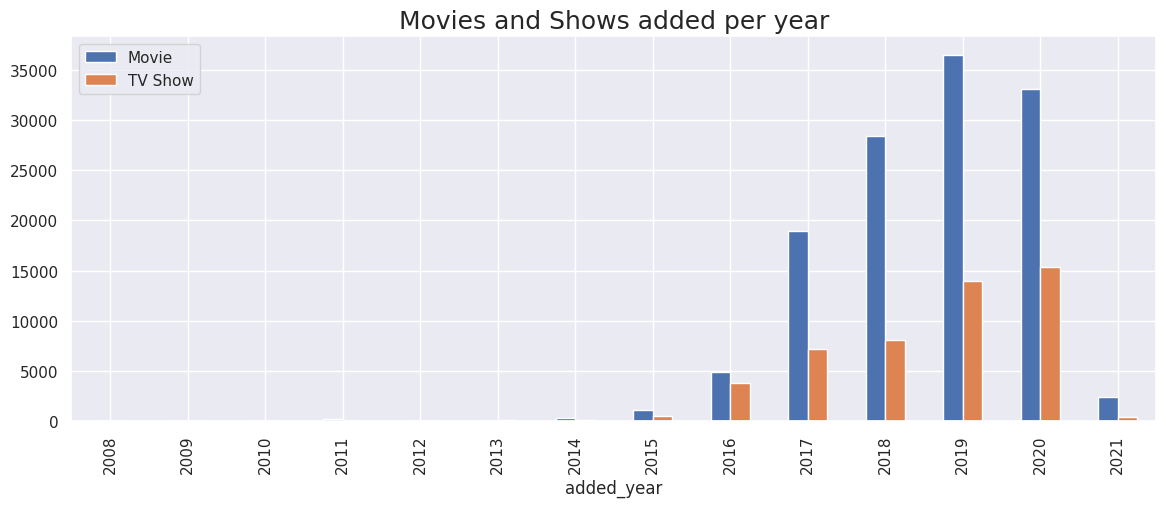

In [ ]:
# Chart - 10 visualization code
# added year
df.groupby('added_year').type.value_counts().unstack().plot.bar(figsize = (14,5))
plt.legend()
plt.title('Movies and Shows added per year',fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart to know the no. of movies/TV Shows added per year.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can see that most of the movies added in the year 2019 and TV Shows in the year 2020

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the year 2021 there is decrement in the no. of shows added per year. That means this is leading a negative growth. There could be various  reasons for happening so. But we need to try to bring this on track by taking care of the flaws.

#### Chart - 11

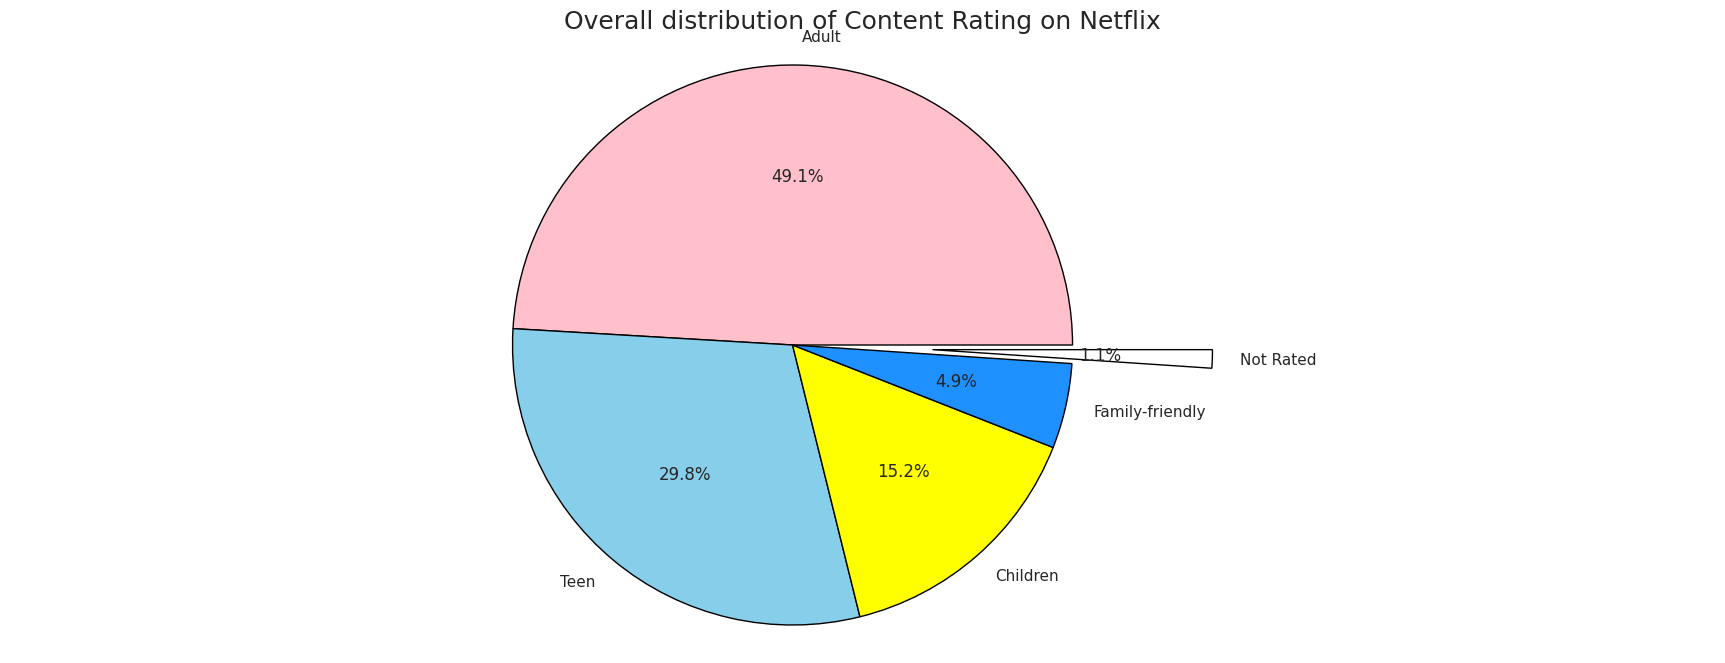

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(22,8))
count= df['rating'].value_counts()
plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['pink','skyblue','yellow','dodgerblue','white'],autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
plt.title(f'Overall distribution of Content Rating on Netflix', fontsize = 18)
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

To know the overall distribution of content rating on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Most of the content present in the Netflix belongs to Adult and the teen categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

--> For high gains production house should more focus on Teen and Adult content.

--> There is good chances of growth in Family-friendly category in TV Shows.

#### Chart - 12

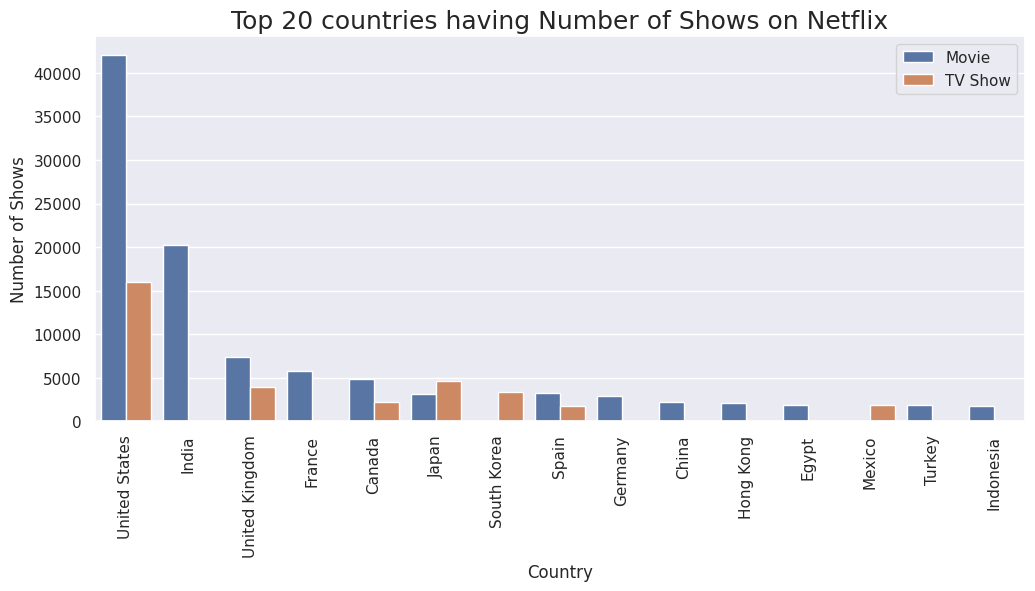

In [ ]:
# Chart - 12 visualization code
df_Country = df.groupby(['Country', 'type'])['title'].count().reset_index()
df_Country = df_Country.sort_values(by='title', ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(data =df_Country[:20], x='Country', y='title', hue='type')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title("Top 20 countries having Number of Shows on Netflix", fontsize = 18)
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

To know the countries doing no. of shows.

##### 2. What is/are the insight(s) found from the chart?

We can see that United States has the highest no. of  shows followed by  India and UK. And in the list of least Mexico, Turkey and Indonesia comes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For a positive growth in this field other countries needs to adopt the some of the strategy of US keeping their own uniquness.

#### Chart - 13

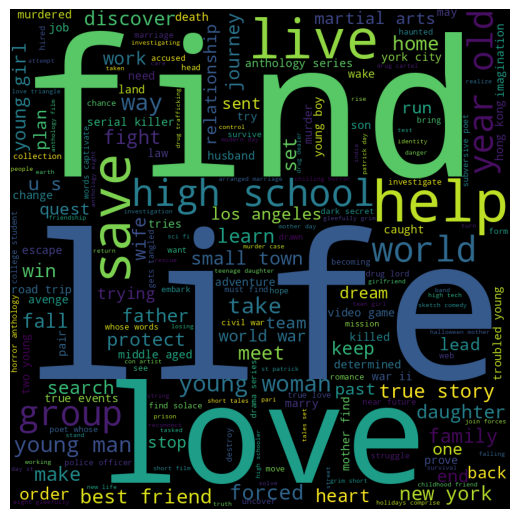

In [ ]:
# Chart - 13 visualization code
comment_words = ' '.join(df['description'].astype(str).str.lower())
stopwords = set(STOPWORDS)                                   # Define the stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color ='black',
                      stopwords= stopwords,
                      min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

The above code generates a word cloud from the descriptions of all the shows and movies in the Netflix dataset. Since this chart is a visualization of text data, it is a good choice to quickly see the most commonly occurring words in the descriptions. It gives an insight into the themes and genres of the shows and movies on Netflix.

##### 2. What is/are the insight(s) found from the chart?

As we can see in the wordcloud most commonly used words are 'love', 'life','find', 'save', 'help' etc.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help create a positive business impact by allowing Netflix to better understand the interests of its users and tailor its content to meet those interests. By identifying popular themes and genres, Netflix can create more targeted marketing campaigns and improve the overall user experience.

#### Chart - 14 - Correlation Heatmap

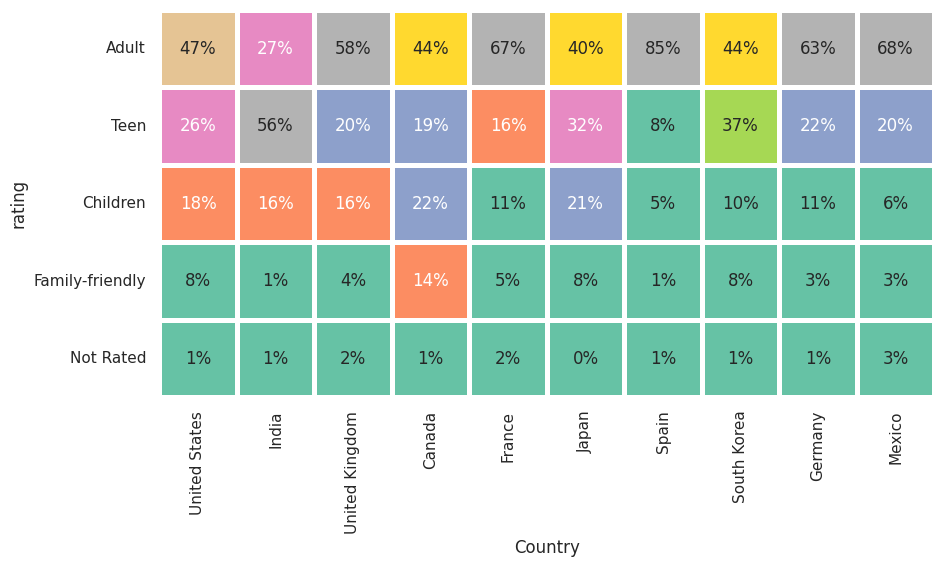

In [ ]:
# Correlation Heatmap visualization code
df['count'] = 1
data = df.groupby('Country')[['Country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['Country']
df_heatmap = df.loc[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea','Germany', 'Mexico']
rating_order = ['Adult', 'Teen', 'Children', 'Family-friendly', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

To know the countries producing which type of content.

##### 2. What is/are the insight(s) found from the chart?

--> We found that most of the countries produces content related to Adult and Teen.

--> Amomg all the countries INDIA has less content in Adult segment than teen content.

--> 85% of content is Adult content from spain.

--> Canada produces more content related to Children and Family-Friendly content.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

title           0
Cast            0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
added_month     0
added_year      0
Originals       0
count           0
dtype: int64

As we can see that we have none missing values left in our datast. So we will move ahead.


### 2. Handling Outliers

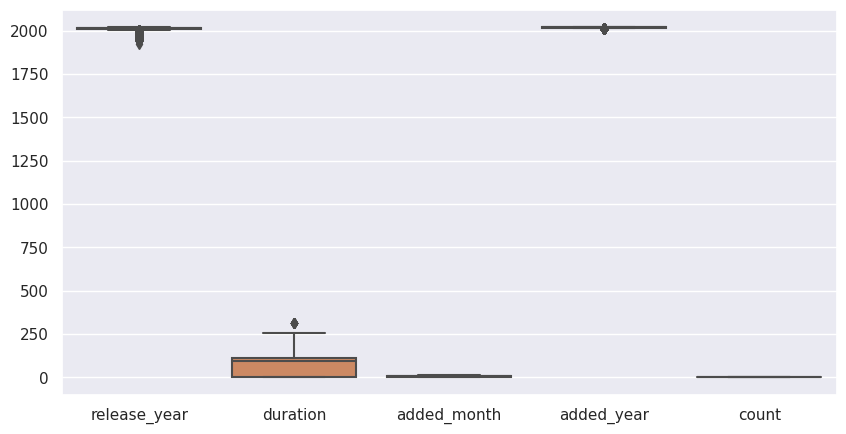

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize = (10,5))
sns.boxplot(data =df)
plt.show()

By analysing the above graph it seems that there is no need to handle outliers.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df.shape

(175807, 14)

In [ ]:
df_copy.shape

(7770, 12)

In [ ]:
# Binning of rating in new dataframe
df_copy['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_copy.sample(3)

show_id     type                      title      director  \
1257   s1258    Movie                    Chaahat  Mahesh Bhatt   
4037   s4038    Movie                   Merantau  Gareth Evans   
972     s973  TV Show  Blazing Transfer Students       unknown   

                                                   cast    country  \
1257  Naseeruddin Shah, Shah Rukh Khan, Pooja Bhatt,...      India   
4037  Iko Uwais, Sisca Jessica, Christine Hakim, Mad...  Indonesia   
972   Daiki Shigeoka, Akito Kiriyama, Junta Nakama, ...      Japan   

             date_added  release_year rating  duration  \
1257        May 1, 2017          1996   Teen   148 min   
4037  February 13, 2019          2009  Adult   112 min   
972   November 10, 2017          2017  Adult  1 Season   

                                              listed_in  \
1257      Dramas, International Movies, Romantic Movies   
4037   Action & Adventure, Dramas, International Movies   
972   International TV Shows, TV Action & Adventure,...   

                                            description  
1257  A vulnerable singer is forced to choose betwee...  
4037  In this fast-paced Indonesian thriller, a youn...  
972   Featuring the boys of Johnny's West, a gang of...

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Creating new feature content_detail with the help of other textual attributes
df_copy["content_detail"]= df_copy["cast"]+" "+df_copy["director"]+" "+df_copy["listed_in"]+" "+df_copy["type"]+" "+df_copy["rating"]+" "+df_copy["country"]+" "+df_copy["description"]

#checking the manipulation
df_copy.head()


show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  Adult  4 Seasons   
1  December 23, 2016          2016  Adult     93 min   
2  December 20, 2018          2011  Adult     78 min   
3  November 16, 2017          2009   Teen     80 min   
4    January 1, 2020          2008   Teen    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [ ]:
# Lower Casing
df_copy['content_detail']= df_copy['content_detail'].str.lower()

# Checking the manipulation
df_copy.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teen india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_copy['content_detail']= df_copy['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_copy.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_copy['content_detail']= df_copy['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_copy.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Downloading stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# create a set of English stop words
stop_words = set(stopwords.words('english'))

# displaying stopwords
print(stop_words)

{'don', 'between', 'below', 'few', 'themselves', 'had', 'own', 'he', 'shouldn', 'any', "she's", 'into', 'needn', "wasn't", 'there', "mustn't", 'them', 'it', 'these', 'of', 'up', 're', 'a', 'ourselves', "isn't", 'his', 'weren', 'my', 'our', 'more', 'in', 'have', 'an', 'theirs', 'isn', 'which', 'herself', 'against', 'me', 've', 'itself', 'at', "you're", 'some', 'down', 'hasn', "you'll", 'am', 'same', 'ma', "mightn't", 'y', 'under', 'wasn', 'didn', 'ain', "shan't", 'does', 'myself', "you'd", 'did', "you've", 'or', "should've", 'yourselves', 'is', 'the', 'by', 'because', 'its', 'after', 'where', "shouldn't", 'been', 'with', 'shan', "hadn't", 'during', 'why', 'nor', "couldn't", 'ours', "aren't", 'was', 'doing', 'for', 'we', 'do', 'that', 'to', 'himself', 'all', 'can', 'were', 'too', 'wouldn', 'off', 'doesn', 'whom', 'being', 'from', 'mightn', 'until', 'hers', 'out', 'each', "needn't", 'won', 'above', 'about', 'this', 'over', 'if', 'aren', 'your', 'mustn', "weren't", 'be', 'yourself', 'she',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_copy['content_detail']= df_copy['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_copy.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [ ]:
df_copy['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adult brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Tokenization

In [ ]:
# Tokenization
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_copy['content_detail']= df_copy['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_copy.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_copy['content_detail']= df_copy['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_copy.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

Answer Here.

#### 8. Part of speech tagging

In [ ]:
# POS Taging
# tokenize the text into words before POS Taging
df_copy['pos_tags'] = df_copy['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_copy.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  Adult  4 Seasons   
1  December 23, 2016          2016  Adult     93 min   
2  December 20, 2018          2011  Adult     78 min   
3  November 16, 2017          2009   Teen     80 min   
4    January 1, 2020          2008   Teen    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### 9. Text Vectorization

In [ ]:
# Vectorizing Text

# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance(setting maximum features as 20,000 to avoid RAM explosion)
Tfidfv = TfidfVectorizer(max_features=20000)

In [ ]:
# Fitting on TfidfVectorizer
x= Tfidfv.fit_transform(df_copy['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 20000)


##### Which text vectorization technique have you used and why?

We have used 'Lemmatization' instead of 'Stemming' for this project bcoz.:

--> Lemmatization produces more accurate base word: Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

--> Lemmatization can handle different inflections: Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

--> Lemmatization produces real words: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

--> Lemmatization improves text understanding: By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

--> Lemmatization supports multiple languages: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 20,000 arrtibutes and this huge amount of features could not be dealed with the local machines. So, we will use the Principal Component Analysis(PCA) techniques to reduce the dimension of this huge sparse matrix.

In [ ]:
# Importing PCA from sklearn
from sklearn.decomposition import PCA

In [ ]:
# DImensionality Reduction (If needed)

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA Model
pca.fit(x.toarray())

PCA()

In [ ]:
# percent of 'Variance' captured by each component
variance = pca.explained_variance_ratio_
print(f"Variance Explanation: {variance}")

Variance Explanation: [1.59297353e-02 4.39603554e-03 3.59362271e-03 ... 6.21198004e-36
 7.48702237e-37 1.05360557e-37]


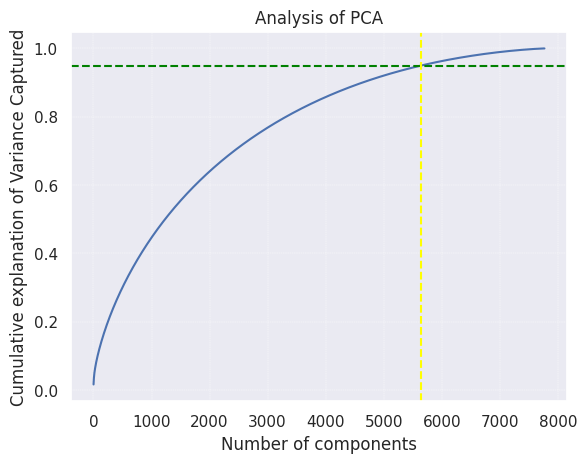

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explanation of Variance Captured')
ax.set_title('Analysis of PCA')
plt.grid(linestyle='--', linewidth=0.3)
plt.axhline(y= 0.95, color='green', linestyle='--')
plt.axvline(x= 5647, color='yellow', linestyle='--')
plt.show()

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.

# Firstly defining the Instance
pca_tuned = PCA(n_components=0.95)

# Fitting and Transforming the Model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

In [ ]:
# Checking the shape of Transformed Matrix
x_transformed.shape

(7770, 5647)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA(Principal Component Analysis) for dimensionality reduction. This technique is used to reduce the dimension of high-dimensional dataset retaining most of the information in the original data.

We have used this technique because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***6. ML Model Implementation***

### ML Model - 1( K-Means Clustering)

Here we have taken 1 to 16 clusters to find the optimal number of clusters with ELBOW method.

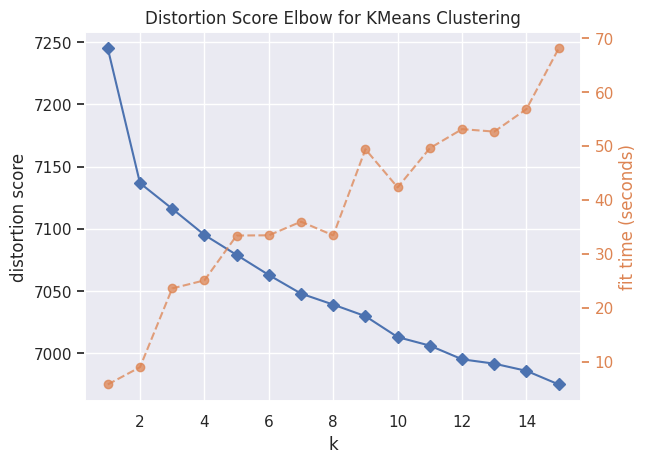

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
Visualization = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the Algorithm
Visualization.fit(x_transformed)

# Predict the Model
Visualization.show()

By observing the above fig. it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

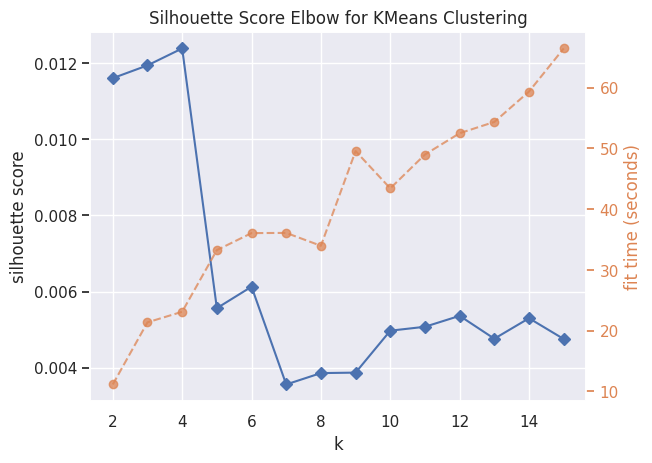

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the Clustering Model and Visualizer
Visualization = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the Visualizer
Visualization.fit(x_transformed)

# Finalize and render the Figure
Visualization.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.011472
k=3, Silhouette score=0.011044
k=4, Silhouette score=0.011710
k=5, Silhouette score=0.012129
k=6, Silhouette score=0.003753


From the above plots, it is very clear that the Silhoutte score is comparatively good for 5 number of clusters, so we will consider only 4 cluster in kmeans analysis.

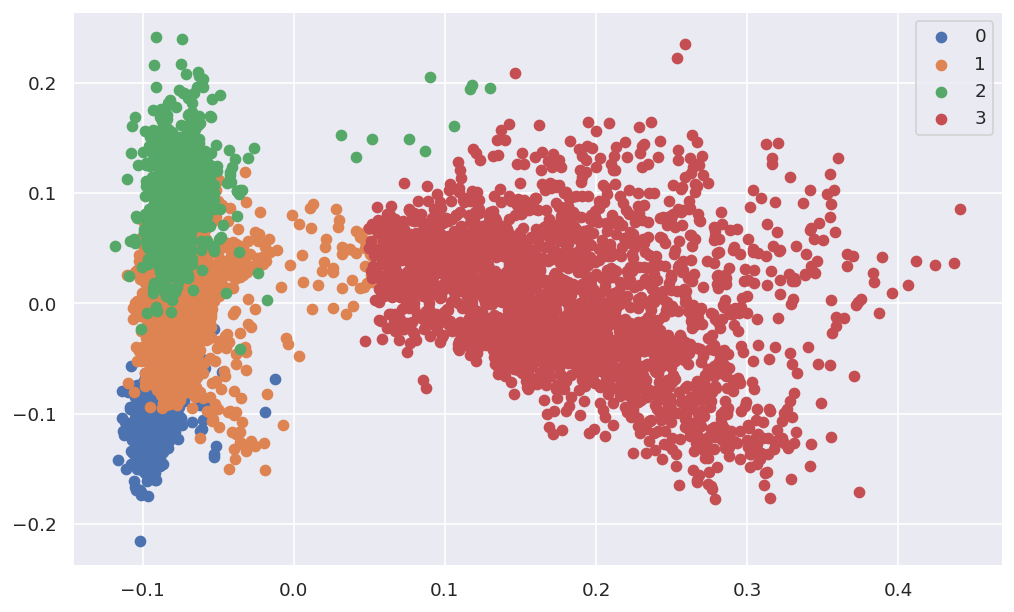

In [ ]:
# Training the 'K-means model' on a dataset
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state= 0)

# predict the Labels of Clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)

# Getting Unique Labels
Unique_Labels = np.unique(label)

# Plotting Results:
for i in Unique_Labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

This is the view of 4 clusters in 2D.

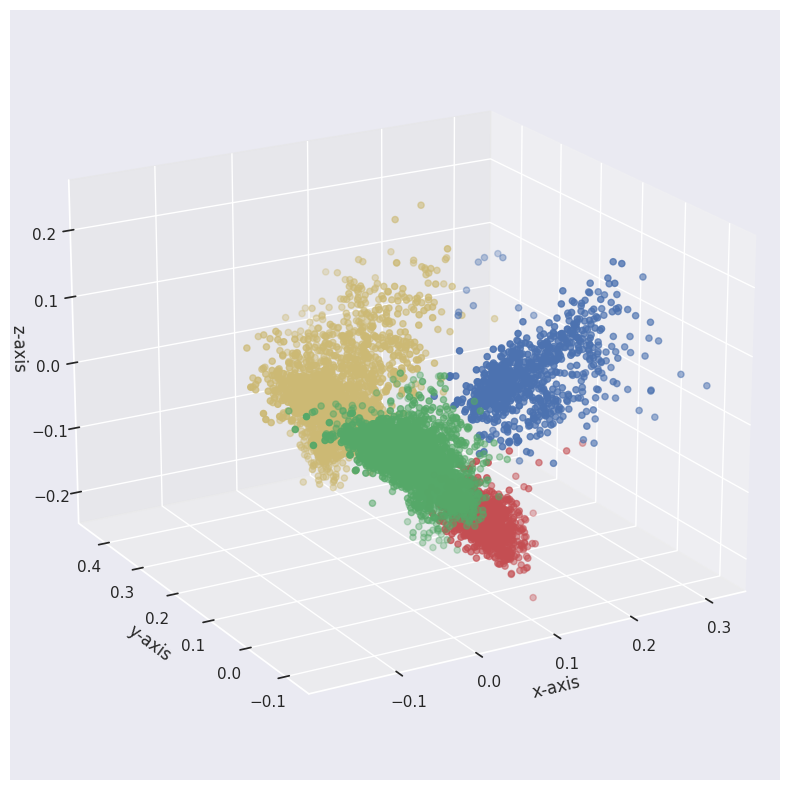

In [ ]:
# Starting with Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot '30 degree' around the X-axis and '45 degree' around the Z-axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

This is the view of 4 clusters in 3D.

In [ ]:
# Add the Cluster Values to the dateframe.
df_copy['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing Evaluation Metric Score Chart

# Firstly we will define the required function to plot a wordcloud for each of the attribute in the given dataframe.

def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    # #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by a specified cluster number and column name
    df_WordCloud = df_copy[['kmeans_cluster', column_name]].dropna()
    df_WordCloud = df_WordCloud[df_WordCloud['kmeans_cluster'] == cluster_number]

    # Combining all the Text Documents into a single string
    text = " ".join(word for word in df_WordCloud[column_name])

    # Creating word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

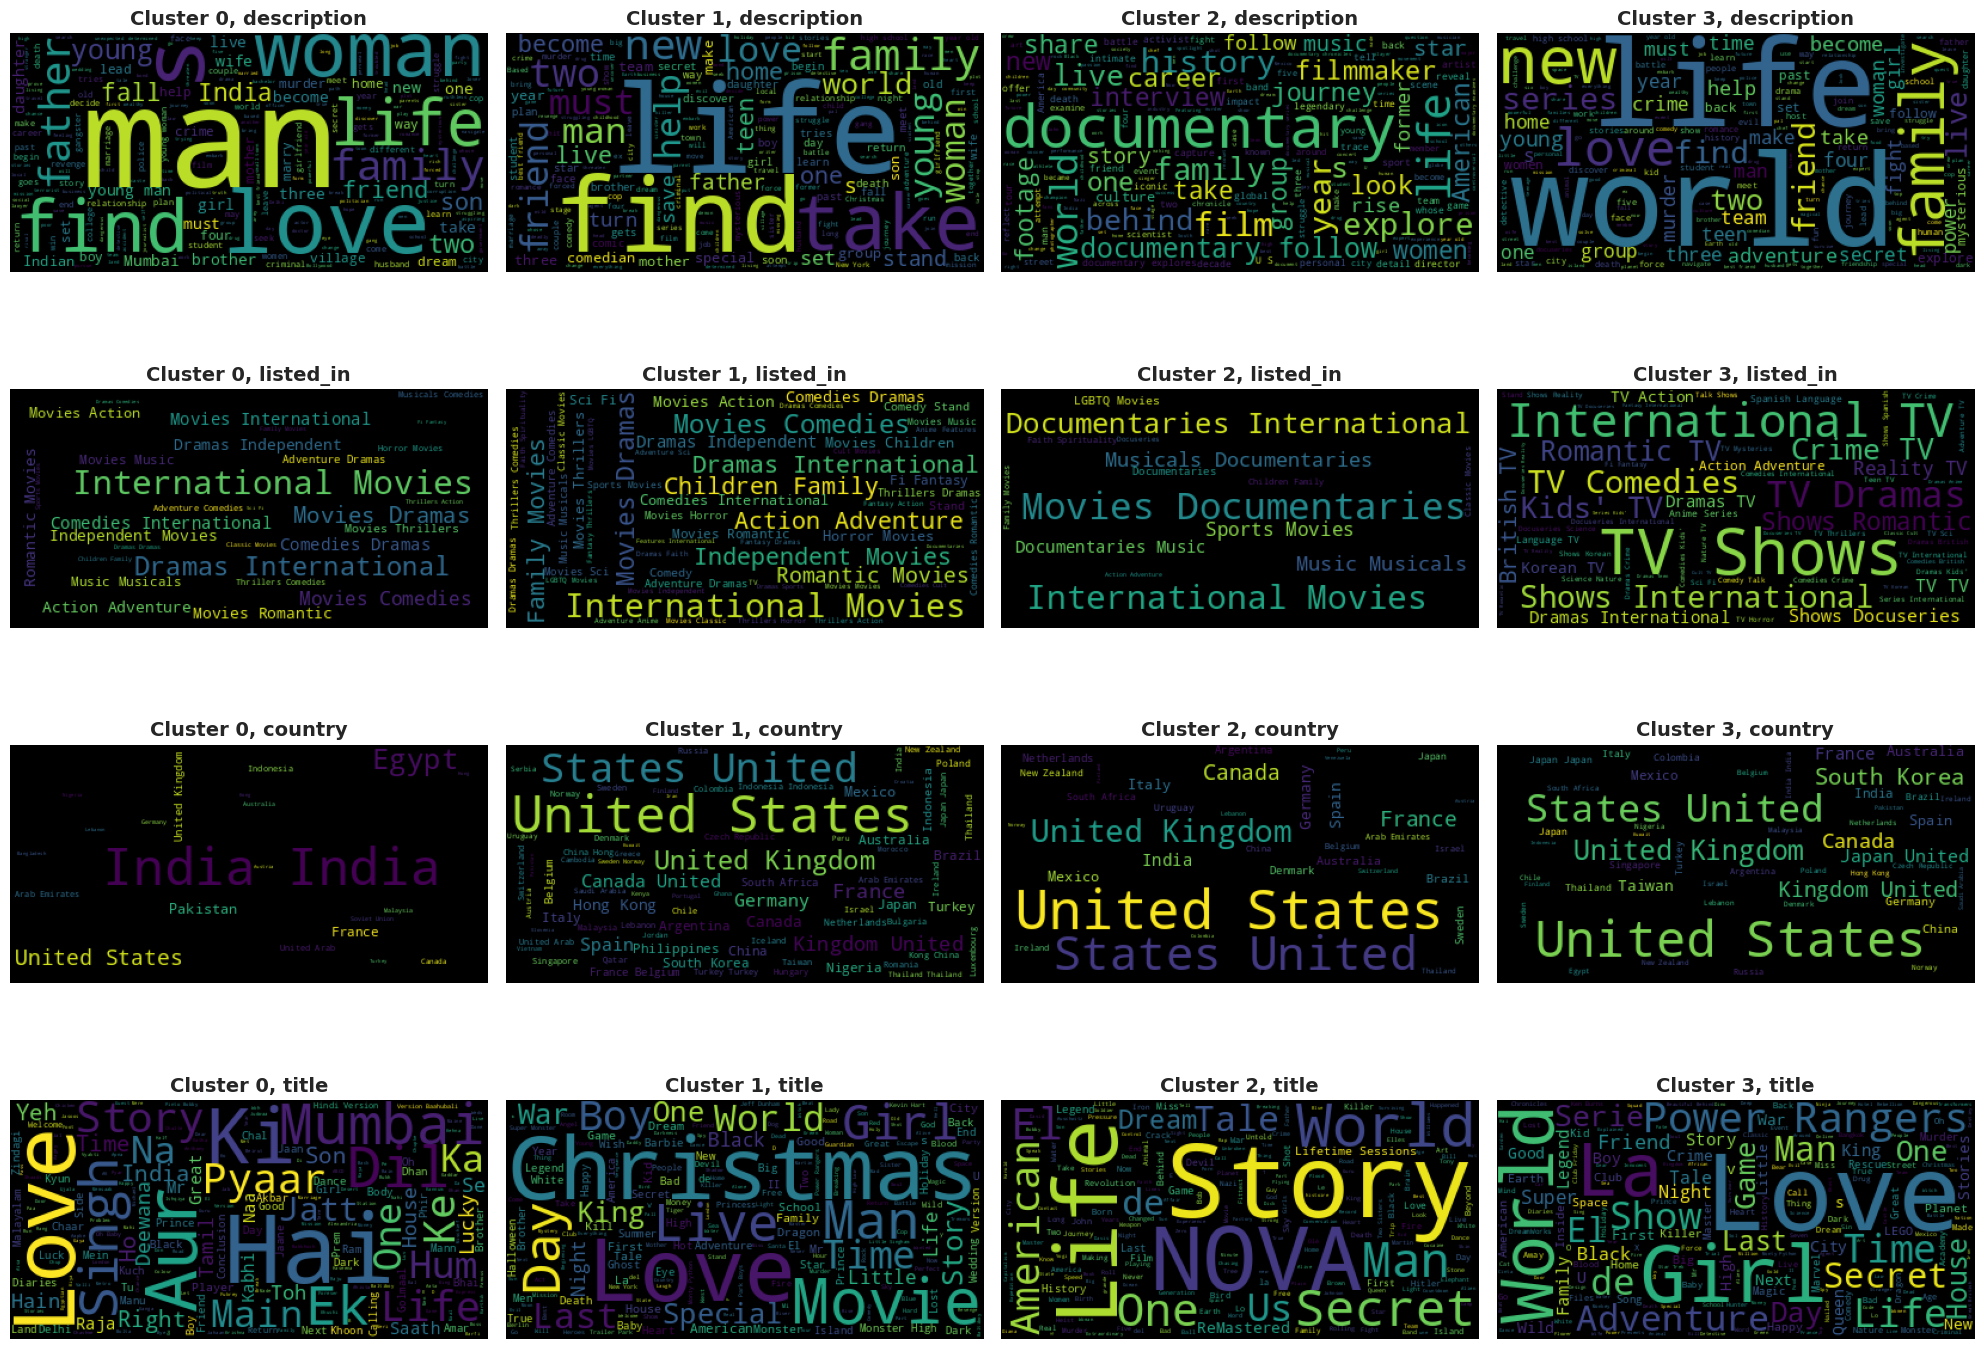

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description','listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2( Hierarchial Clustering)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

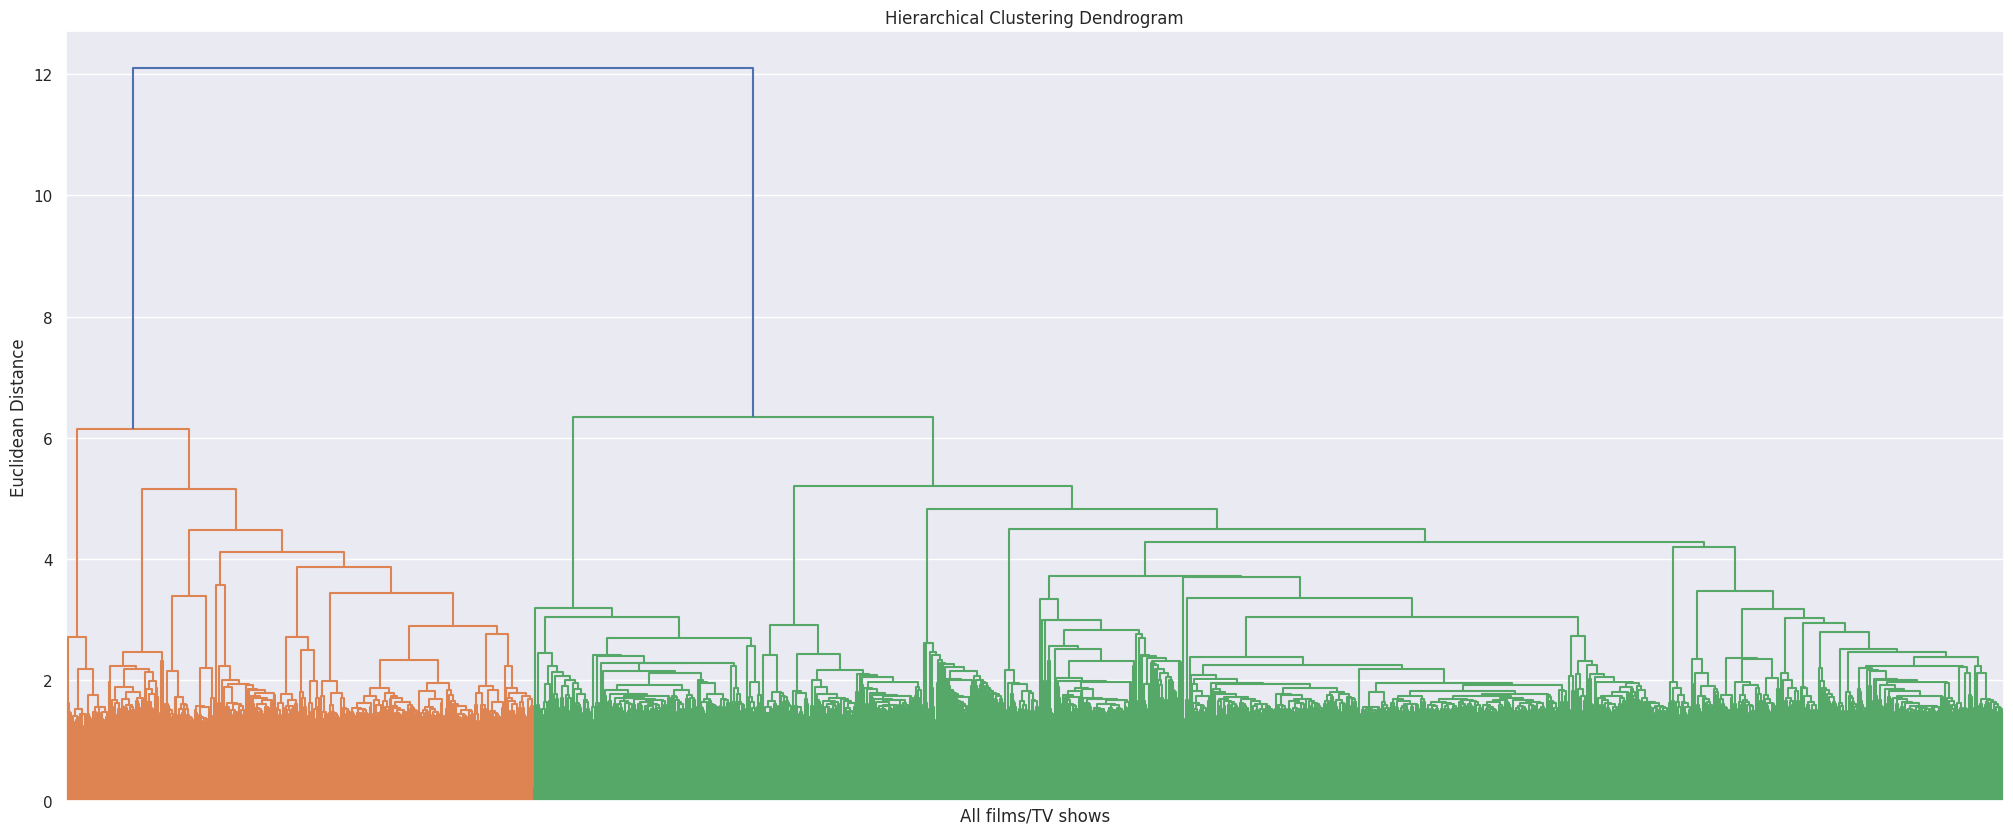

In [ ]:
# Visualizing evaluation Metric Score chart

#importing the required libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# Hierarchial Clustering
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.006411
k=3, Silhouette score=0.006140
k=4, Silhouette score=0.000449
k=5, Silhouette score=0.000452
k=6, Silhouette score=0.001124
k=7, Silhouette score=0.001476
k=8, Silhouette score=0.001833
k=9, Silhouette score=0.001445


By observing the above Silhouette Scores, it is clear that the 2 clusters are at optimal value (maximum Silhouette score).

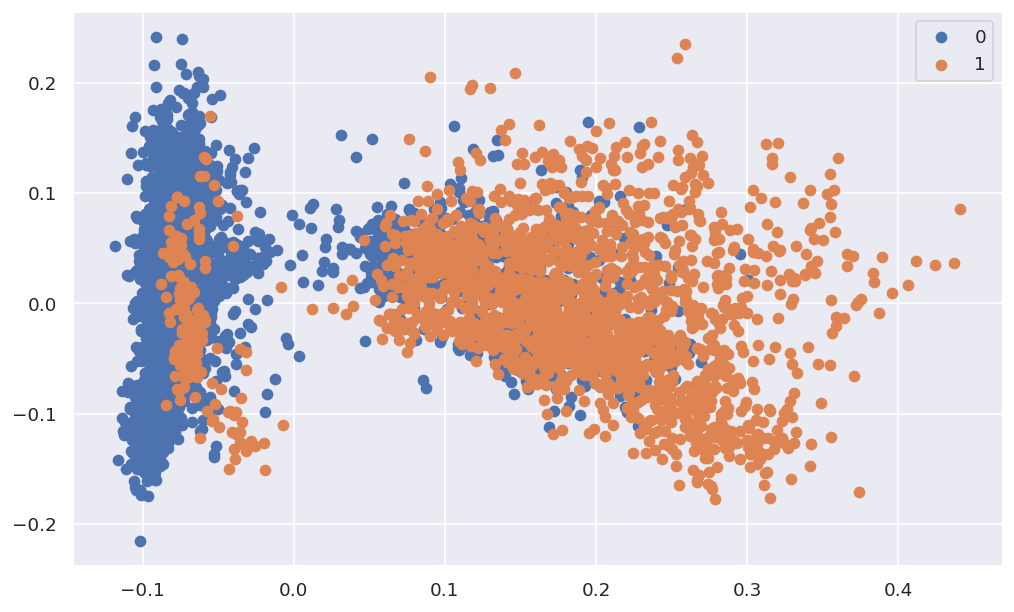

In [ ]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

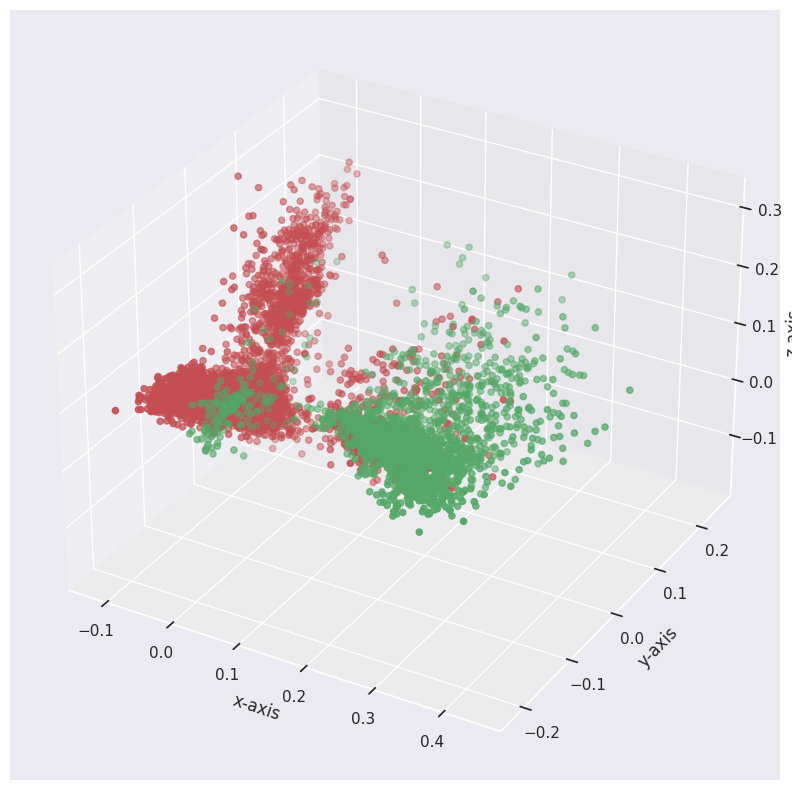

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df_copy['agglomerative_cluster'] = Agmodel.labels_

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Firstly we will define a function that plots wordcloud for different attributes by using Agglomerative Clustering.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_copy[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

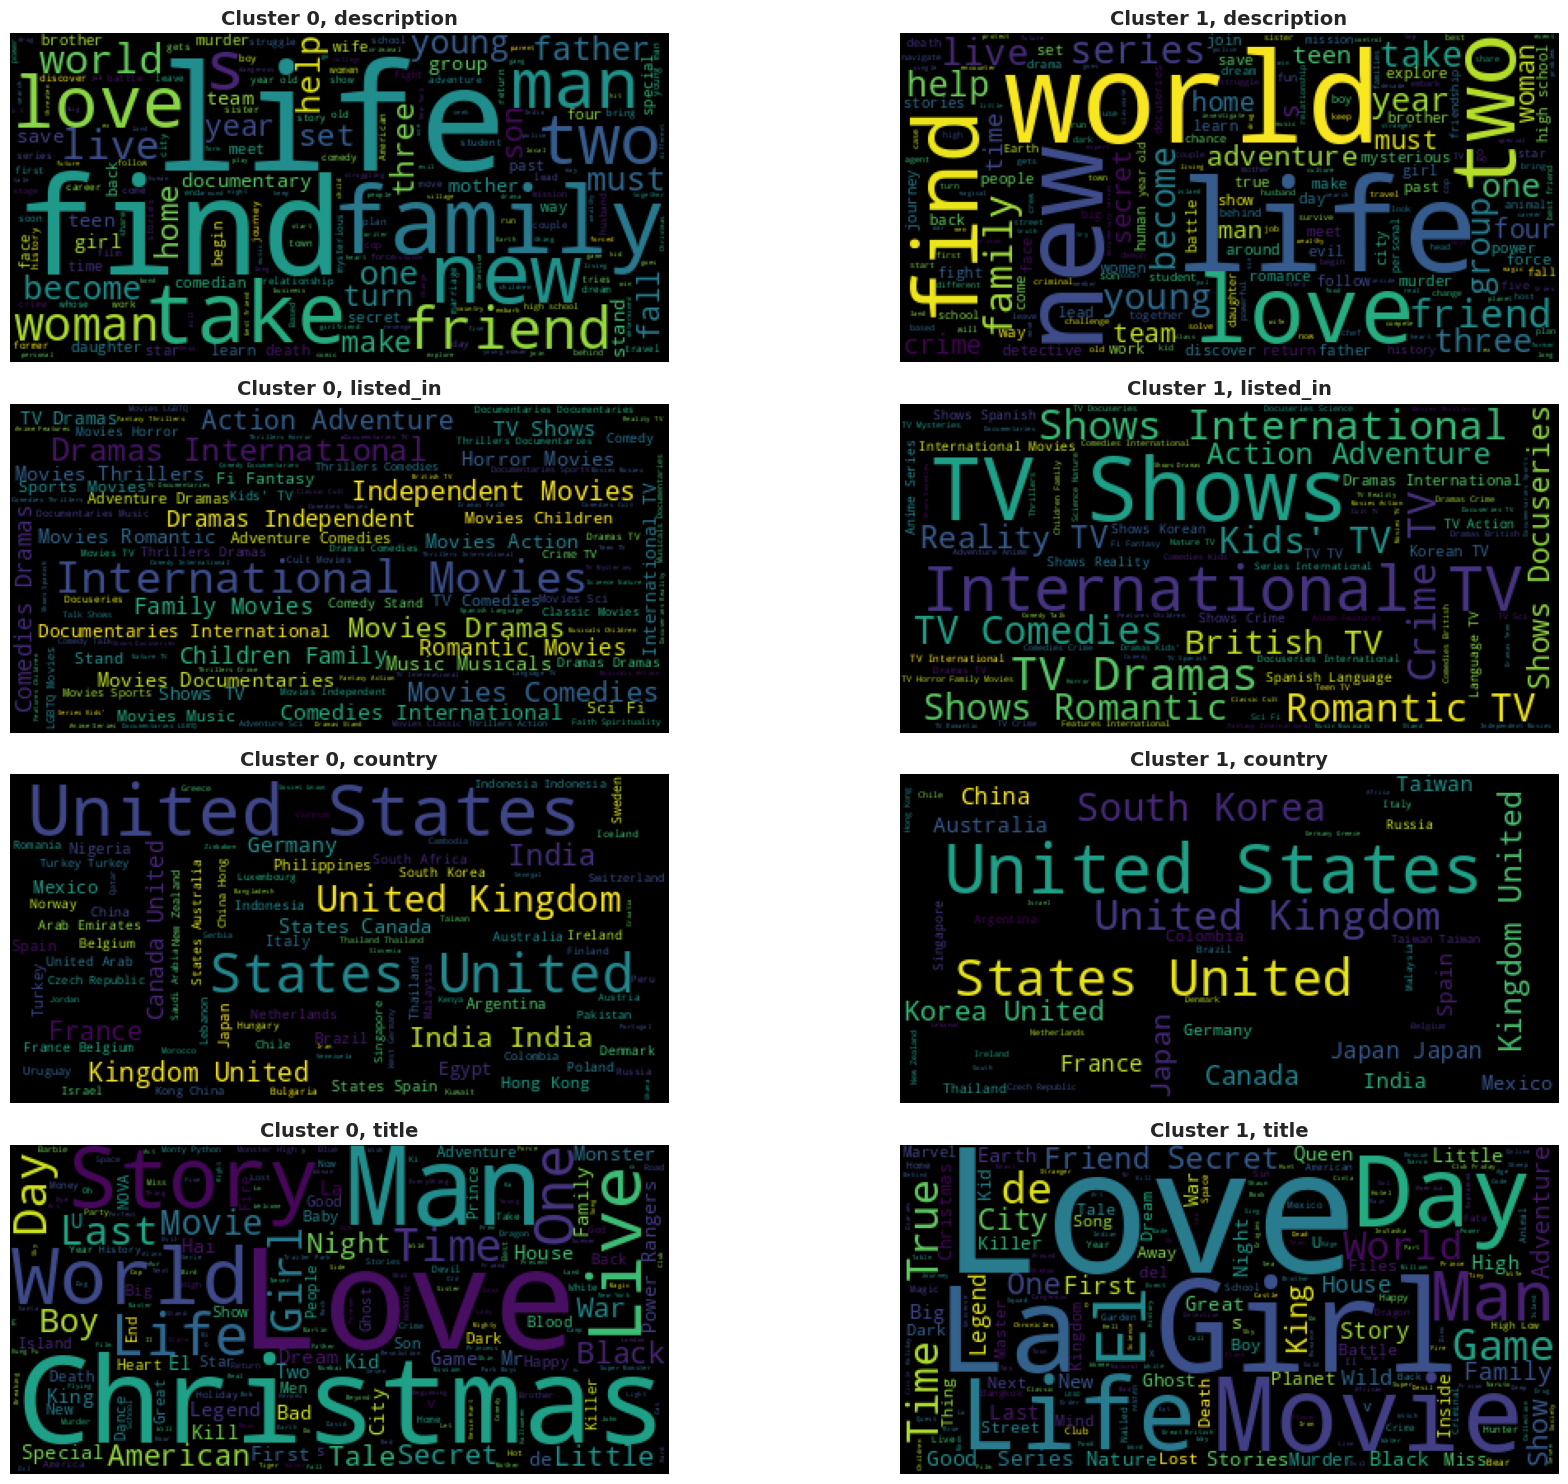

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3(Building a Recommendation System)

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
Tfidf = TfidfVectorizer(stop_words='english')
Tfidf_Matrix = Tfidf.fit_transform(df_copy['content_detail'])

# Compute cosine similarity matrix
Cosine_sim = cosine_similarity(Tfidf_Matrix)

def recommend_content(title, Cosine_sim=Cosine_sim, data=df_copy):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    Sim_Scores = list(enumerate(Cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    Sim_Scores = sorted(Sim_Scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in Sim_Scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in Sim_Scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Now we will check the performace of our recommender system.

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2563
1                                          Kya Kehna                 0.2294
2  My Next Guest with David Letterman and Shah Ru...                 0.2041
3                                 Kuch Kuch Hota Hai                 0.1836
4                              Together For Eternity                 0.1835
5                               Kabhi Haan Kabhi Naa                 0.1810
6                                    Chashme Baddoor                 0.1771
7                           Kabhi Khushi Kabhie Gham                 0.1719
8                             Kabhi Alvida Naa Kehna                 0.1708
9                                      Chalte Chalte                 0.1694

In [ ]:
# Testing non indian movie
recommend_content('Equilibrium')

Recommendation  Similarity_score(0-1)
0              F.R.E.D.I.                 0.1207
1           Event Horizon                 0.1092
2  Aliens Ate My Homework                 0.1039
3     The Humanity Bureau                 0.0952
4                    3022                 0.0936
5       Jupiter Ascending                 0.0895
6               Abdo Mota                 0.0880
7    Terminator Salvation                 0.0878
8                 Krystal                 0.0865
9            All American                 0.0851

In [ ]:
recommend_content('Zindagi Na Milegi Dobara')

Recommendation  Similarity_score(0-1)
0   Luck by Chance                 0.2656
1  Dil Dhadakne Do                 0.2164
2          Lakshya                 0.1726
3   Bombay Talkies                 0.1565
4             Zero                 0.1555
5            Dev.D                 0.1528
6            Don 2                 0.1474
7    Ghost Stories                 0.1463
8         Shanghai                 0.1450
9          Waiting                 0.1433

In [ ]:
recommend_content('Golmaal: Fun Unlimited')

Recommendation  Similarity_score(0-1)
0        Golmaal Returns                 0.2665
1        Phir Hera Pheri                 0.1942
2               Hattrick                 0.1657
3  Maine Pyaar Kyun Kiya                 0.1586
4             Himmatwala                 0.1523
5              Thank You                 0.1440
6           Chup Chup Ke                 0.1359
7      Tum Milo Toh Sahi                 0.1315
8   Kyaa Kool Hain Hum 3                 0.1313
9                Singham                 0.1311

In [ ]:
recommend_content('Ramayan')

Recommendation  Similarity_score(0-1)
0        Terrorism Close Calls                 0.1576
1  Prince Jai Aur Dumdaar Viru                 0.1502
2              College Romance                 0.1322
3          Anjaan: Rural Myths                 0.1248
4           Girls Incarcerated                 0.1234
5                 Girls Hostel                 0.1182
6                       Bitten                 0.1173
7    Boca Juniors Confidential                 0.1117
8               Tiny Creatures                 0.1099
9                 Razia Sultan                 0.1086

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen Silhoutte Score as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters. Silhouette score is less sensitive to the shape of the clusters. Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We will choose k-means Clustering as our final prediction model  as we are getting comparatevely high Silhoutte Score in 'K-means clustering' and the resulted clusters are very well seperated from each others as have saw in the 3D.

Also K-means Clustering works more accurately than the other clustering methods in the follwing manner:

--> Speed: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

--> Ease of use: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

--> Scalability: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

--> Independence of clusters: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

# **Conclusion**

**Conclusions drawn from EDA**

--> Dataset contains only 28.3% TV Shows and 71.7% Movies on Netflix.

--> Most of the movies are released in 2018 and TV Shows in the 2019.

Whereas least movie released in the year 2021 and least TV Shows in the year 2021.

--> Most of the movies are added in the month of January, October and December

And most of the TV Shows are added in the month of October, Nov. and December.

--> United States is the leading country in content creation. India and Canada are at the 2nd and 3rd place in the list

South Korea, Germany and Mexico are at the least position.

--> International Movies, Dramas and Comedies are the leading Genere.

--> Jan Suter, Raul Campos and Marcus Raboy are the leadding directors.

--> Anupam Ker, Shahrukh Khan and Om Puri are the leading actors among all.

--> The average duration of the movies is around 90 to 110 min.

--> Netflix production source is 31.1% and other production source is 68.9%.

--> Most of the movies added in the year 2019 and TV Shows in the year 2020

--> Most of the content present in the Netflix belongs to Adult and the teen categories.

--> United States has the highest no. of shows followed by India and UK. And in the list of least Mexico, Turkey and Indonesia comes.

--> In the wordcloud most commonly used words are 'love', 'life','find', 'save', 'help' etc.

--> We found that most of the countries produces content related to Adult and Teen.

--> Amomg all the countries INDIA has less content in Adult segment than teen content.

--> 85% of content is Adult content from spain.

--> Canada produces more content related to Children and Family-Friendly content.

**Conclusions drawn from ML Model**

We have used 3 ML Model - (i) k-means clustering  (ii) Hierarchial clustering  (iii) Building a Recommendattion System

(i) In k-means we have used silhoutte score as the evaluation metric and we got 4 optimal number of clusters from k-means

(ii) In Hierarchial clustering we have used Agglomerative Hierarchial clustering and we got 2 optimal number of clusters

(iii) Built a Recommendation System using cosine similarity and generating 10 recommendation based on the type of shows they watch. It will improve user experince and reduce subscriber churn.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***